In [76]:
from scipy.io import arff
import pandas as pd
import numpy as np
import math

from numpy import unique
from numpy import where
from matplotlib import pyplot

data = arff.loadarff('./DefectData-master/DefectData/inst/extdata/terapromise/mccabe/MC1.arff')
df = pd.DataFrame(data[0])

In [77]:
r=df.shape[0]
c=df.shape[1]
print(r,c)
df.head()

1988 39


,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,8.0,17.0,12.0,1.0,11.0,30.0,9.0,0.16,14.0,8.0,...,38.0,0.12,69.0,95.0,33.0,20.0,76.0,18.18,55.0,b'N'
1,2.0,5.0,3.0,1.0,0.0,8.0,3.0,0.19,4.0,3.0,...,14.0,0.15,26.0,31.0,15.0,10.0,20.0,6.25,16.0,b'N'
2,11.0,7.0,2.0,0.0,117.0,12.0,4.0,0.08,6.0,4.0,...,34.0,0.02,188.0,252.0,18.0,23.0,183.0,68.82,53.0,b'N'
3,0.0,5.0,1.0,0.0,0.0,8.0,3.0,0.60,4.0,2.0,...,8.0,0.43,5.0,8.0,4.0,6.0,7.0,0.00,5.0,b'N'
4,0.0,1.0,2.0,0.0,2.0,0.0,1.0,0.20,0.0,1.0,...,4.0,0.11,10.0,18.0,4.0,9.0,9.0,28.57,5.0,b'N'


In [78]:
buggy = b'Y'
clean = b'N'
x = df.drop(['Defective'],axis = 'columns')

for i in range(r):
    if df.iloc[i,c-1] == buggy:
        df.iloc[i,c-1] = 1
    else:
        df.iloc[i,c-1] = 0

y = df['Defective']
y = y.astype(int)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Defective, dtype: int32

NB: 0.929587 (0.038584)
SVM: 0.976864 (0.004005)
KNN: 0.976362 (0.005036)
RF: 0.978879 (0.005849)
LR: 0.971331 (0.004503)


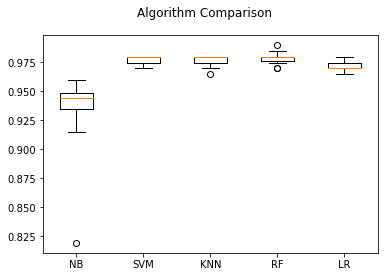

In [85]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
X = x
Y = y
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
import warnings
warnings.filterwarnings('ignore')


In [86]:


results

[array([0.81909548, 0.94472362, 0.94472362, 0.93467337, 0.94974874,
        0.94974874, 0.95979899, 0.91457286, 0.93434343, 0.94444444]),
 array([0.96984925, 0.9798995 , 0.9798995 , 0.96984925, 0.9798995 ,
        0.9798995 , 0.97487437, 0.97487437, 0.97979798, 0.97979798]),
 array([0.96482412, 0.9798995 , 0.9798995 , 0.96984925, 0.9798995 ,
        0.9798995 , 0.97487437, 0.97487437, 0.97979798, 0.97979798]),
 array([0.96984925, 0.9798995 , 0.9798995 , 0.97487437, 0.9798995 ,
        0.98492462, 0.96984925, 0.9798995 , 0.98989899, 0.97979798]),
 array([0.96984925, 0.96984925, 0.9798995 , 0.96482412, 0.96984925,
        0.97487437, 0.96984925, 0.96482412, 0.97474747, 0.97474747])]